In [1]:
# Dependencies and Setup
import pandas as pd               # Pandas handles dataframes
import numpy as np
import scipy
import matplotlib                 # Numpy handles lots of basic maths operations
import matplotlib.pyplot as plt   # Matplotlib for plotting
import seaborn as sns             # Seaborn for beautiful plots
import statsmodels
import scipy.stats as sts

In [2]:
# Name of the CSV file
file = 'surtemp.csv'

In [3]:
# The correct encoding must be used to read the CSV in pandas
df = pd.read_csv(file, encoding="ISO-8859-1")

In [4]:
df.head()

,year,gistemp,ci95
0,1880,-0.1557,0.138795
1,1881,-0.0720,0.134320
2,1882,-0.0977,0.137396
3,1883,-0.1611,0.136250
4,1884,-0.2760,0.141249


In [5]:
df.dtypes

year         int64
gistemp    float64
ci95       float64
dtype: object

The linear regression equation is y = 0.01x + -14.72


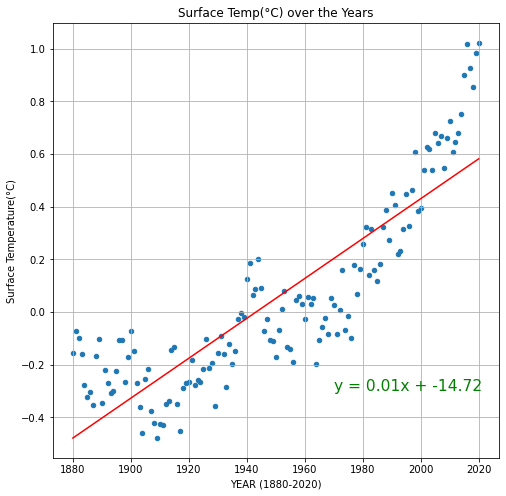

In [6]:
df.plot(kind="scatter",
              x="year", 
              y="gistemp", 
              grid=True, 
              figsize=(8,8),
              title="Surface Temp(°C) over the Years")
                
    
plt.ylabel('Surface Temperature(°C)')
plt.xlabel('YEAR (1880-2020)')

# define x and y values
x_values = df['year']
y_values = df['gistemp']

# linear regression
(slope, intercept, rvalue, pvalue, stderr) = sts.linregress(x_values, y_values)
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f'The linear regression equation is {line_eq}')


# calculate regression values
reg_values = x_values * slope + intercept
plt.plot(x_values, reg_values, "r-")
plt.annotate(line_eq,(1970,-0.3),fontsize=15.5,color="green")

plt.show()


# Lowess Simulation trial

/Users/enochkwon/miniconda3/envs/PythonData/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


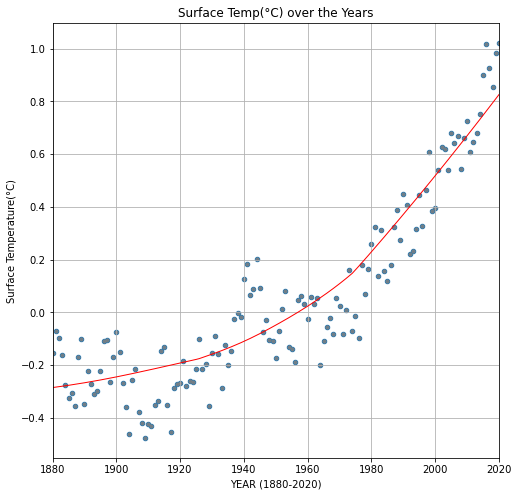

In [7]:
df.plot(kind="scatter",
              x="year", 
              y="gistemp", 
              grid=True, 
              figsize=(8,8),
              title="Surface Temp(°C) over the Years")
                
    
plt.ylabel('Surface Temperature(°C)')
plt.xlabel('YEAR (1880-2020)')

# define x and y values
x_values = df['year']
y_values = df['gistemp']


# Seaborne solution:
sns.regplot(x_values, y_values, data=df,  color="grey", scatter_kws={"s": 10},
             line_kws={"color":"r","alpha":1,"lw":1} ,lowess=True)

plt.xlabel("YEAR (1880-2020)"), plt.ylabel("Surface Temperature(°C)")



plt.show()
